# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(bookReviewDataSet_filename)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. The data set I have chosen is the Book Reviews dataset (bookReviewsData.csv)
2. I will be predicting the "psoitive review" column, which will indicate whether a review is positive (True) or not (False).
3. This is a supervised learning problem because we have labeled data that maps inputs (reviews) to outputs (positive or not). It is specifically a classification problem, more precisly a binary classification task, since the label only has two possible values: True (positive review) or False (not positive review).
4. The primary feature is the "Review" text itself. After exploratory data analysis, this text will likely be transformed into numerical features using NLP techniques such as TF-IDF or word embeddings.
5. Being able to predict whether a review is positive is based on its content provides value in multiple ways. For example, a company like Amazon or Goodreads could automatically flag or feature positive reviews, improving user experience and engagement. It can also help authors and publishers monitor sentiment trends, assist in review moderation, or personalize reccomendations. Predictive sentiment analysis models can reduce manual review efforts and enhance strategic decision-making in content-driven platforms. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# Inspect the data 
print("Data Types and Non-Null Counts:")
print(df.info())

print("\nSample of the data:")
display(df.head())

# Check for missing values 
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check value distribution for class balance
print("\nDistribution of 'Positive Review':")
print(df['Positive Review'].value_counts(normalize=True))

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review           1973 non-null   object
 1   Positive Review  1973 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 17.5+ KB
None

Sample of the data:


,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True



Missing values in each column:
Review             0
Positive Review    0
dtype: int64

Distribution of 'Positive Review':
False    0.503294
True     0.496706
Name: Positive Review, dtype: float64


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. After inspecting the data, I concluded that the only feature I will use is the "Review" text column, which has valuable information for predicting sentiment. The label is the "Positive Review" column.
2. To prepare the review text for modeling, I will use multiple NLP preprocessing steps such as: converting all text to lowercase, remove puncuation/special characters, remove numerical digits, remove common stop words, tokenize text, and apply TF-IDF vectorization to convert text into numerical features suitable for ML models.
3. I plan to use multiple models to compare performance, starting with simple and interpretale algorithms. The baseline model: Logistic Regression (TF-IDF vectors) and additional models might be: Multinomial naive bayes, SVM, or Random forest classifier.
4. Start with data splitting: I will split my dataset into training and testing sets using an 80/20 ratio to evaluate generalization performance on unseen data. Next is traing: I will train each model using tradining data after TF-IDF vectorization of the review text. Then Evaluation of the model using accuracy, precision, confusion matrix, and recall. Lastly, If the baseline performance is insufficient, I will adjust TF-IDF parameters, tune hyperparameters, and consider using advanced NLP methods like word embeddings or deep learning models.

The goal is to select the best performing model that generalizes well to new, unseen reviews and maintains fairness between positive and negative predictions. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [4]:
# Text preprocessing & modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [5]:
# Step 2: Prepare data 

# Separate features and labels
X = df['Review']
y = df['Positive Review']

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df=0.9)

# Fit and transform training data, transform test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [6]:
# Step 3: Fit a baseline model 

# Initialize and train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred_logreg = logreg.predict(X_test_tfidf)

# Evaluate performance
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Performance:
              precision    recall  f1-score   support

       False       0.81      0.83      0.82       195
        True       0.83      0.81      0.82       200

    accuracy                           0.82       395
   macro avg       0.82      0.82      0.82       395
weighted avg       0.82      0.82      0.82       395



In [7]:
# Step 4: Try another model 

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

print("Multinomial Naive Bayes Performance:")
print(classification_report(y_test, y_pred_nb))

Multinomial Naive Bayes Performance:
              precision    recall  f1-score   support

       False       0.75      0.91      0.82       195
        True       0.89      0.71      0.79       200

    accuracy                           0.81       395
   macro avg       0.82      0.81      0.81       395
weighted avg       0.82      0.81      0.81       395



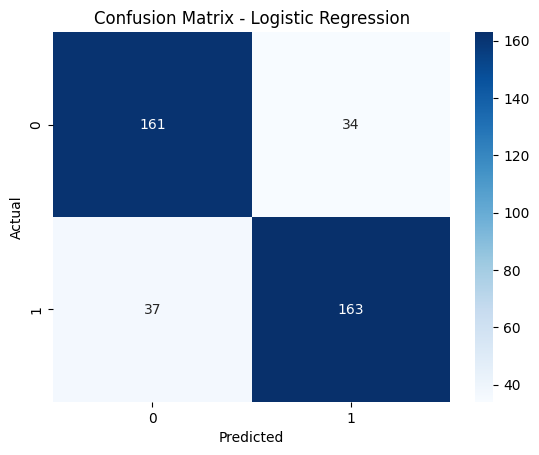

In [8]:
# Step 5: Visualize confusion matrix 

conf_matrix = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [9]:
# Step 6: Model Comparison 

models = {
    "Logistic Regression": y_pred_logreg,
    "Naive Bayes": y_pred_nb
}

for name, preds in models.items():
    print(f"\n{name} - Accuracy: {accuracy_score(y_test, preds):.4f} | F1 Score: {f1_score(y_test, preds):.4f}")


Logistic Regression - Accuracy: 0.8203 | F1 Score: 0.8212

Naive Bayes - Accuracy: 0.8076 | F1 Score: 0.7889


In [10]:
# Step 7: Improve with grid search on logistic regression 

# Grid search for best logistic regression params
params = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid = GridSearchCV(LogisticRegression(), params, cv=5, scoring='f1')
grid.fit(X_train_tfidf, y_train)

print("Best Logistic Regression Parameters:", grid.best_params_)

# Evaluate best model
y_pred_grid = grid.predict(X_test_tfidf)
print("Improved Logistic Regression Performance:")
print(classification_report(y_test, y_pred_grid))

Best Logistic Regression Parameters: {'C': 1, 'solver': 'lbfgs'}
Improved Logistic Regression Performance:
              precision    recall  f1-score   support

       False       0.81      0.83      0.82       195
        True       0.83      0.81      0.82       200

    accuracy                           0.82       395
   macro avg       0.82      0.82      0.82       395
weighted avg       0.82      0.82      0.82       395



In this project, I developed a machine learning model to classify book reviews as positive or not, using natural language processing techniques and supervised learning. After preparing the text data with TF-IDF vectorization, I trained and evaluated multiple models, including Logistic Regression and Multinomial Naive Bayes. Logistic Regression delivered the best performance with an F1-score of 0.82 and balanced precision and recall across both classes. A grid search confirmed that the default parameters were optimal for this model. Overall, the model demonstrates strong generalization and could be valuable for platforms that rely on automated sentiment classification to enhance user experience and content curation. Future improvements could include experimenting with deep learning models or incorporating additional linguistic features for even greater accuracy.